# Market Segmentation and Consumer Behavior

## Goals
- Kmeans
- Deep learning (autoencoder)

## Import Libraries and Datasets

Quick exploration on two extreme cases

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
cc_df = pd.read_csv('Marketing_data.csv')
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Personal Note**

Explore some of the means and maxs of the the df and comment on some observations

**Personal Note**

Explore some of the extremes

**Large one off purchase**
- The extreme with the larget one off purchase (probably a car)
- Make a lot purchases (some large), but avoid cash advance. Perhaps an individual with money and sensitive to interest rate?
- Make 101 purchases
- Min payment is 46000
- Cash advance frequency is 0.08 (very little compare to the guy below)

In [7]:
cc_df[cc_df['ONEOFF_PURCHASES'] == cc_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**Large Cash Advance withdrawl**

- Guy likes cash advance options
- Frequency is a lot
- 123 chas advance transactions

In [8]:
cc_df[cc_df.CASH_ADVANCE == cc_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualize and Explore df

**Missing Values**

<AxesSubplot:>

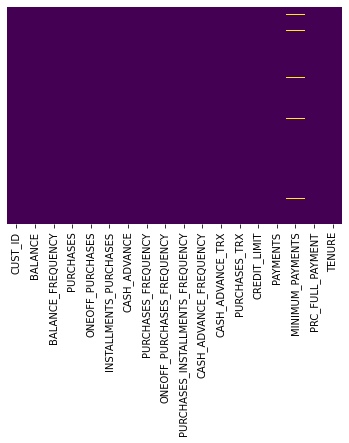

In [9]:
plt.rc('figure', figsize = (10, 8))
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

In [10]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
print(round(cc_df.MINIMUM_PAYMENTS.isnull().sum() / cc_df.shape[0] * 100, 4), "%")

3.4972 %


**Fill in Missing Values for Credit Limit**

Since the "CREDIT_LIMIT" is only missing 1 value, we can fill it in with the mean of the entire column.

In [12]:
cc_df.CREDIT_LIMIT.fillna(value = cc_df.CREDIT_LIMIT.mean(), inplace=True)

**Fill in Missing Values for Min Payment**

Since the "MINIMUM_PAYMENTS" is only missing 3.497%, we can fill it in with the mean of the entire column

In [13]:
cc_df.loc[cc_df.MINIMUM_PAYMENTS.isnull() == True, 'MINIMUM_PAYMENTS'] = cc_df.MINIMUM_PAYMENTS.mean()

In [14]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

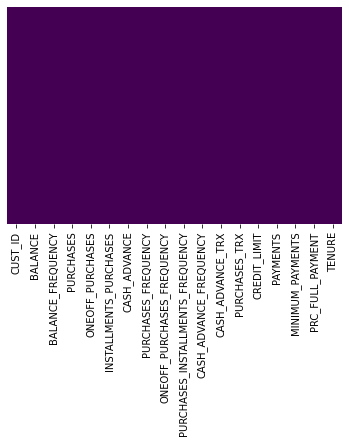

In [15]:
sns.heatmap(cc_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

**Drop Data**

In [16]:
cc_df.drop('CUST_ID', axis = 1, inplace=True)

In [17]:
cc_df.shape

(8950, 17)

**DISPLOT**

        sns.distplot()

Displot combines matplotlib.hist with seaborn kdeplot()
- kde = kernal density estimate
- kde: used for visualizing the probability density of a continuous variable
    - Demonstrates the probability density at different values in a continuous variable

In [18]:
len(cc_df.columns)

17

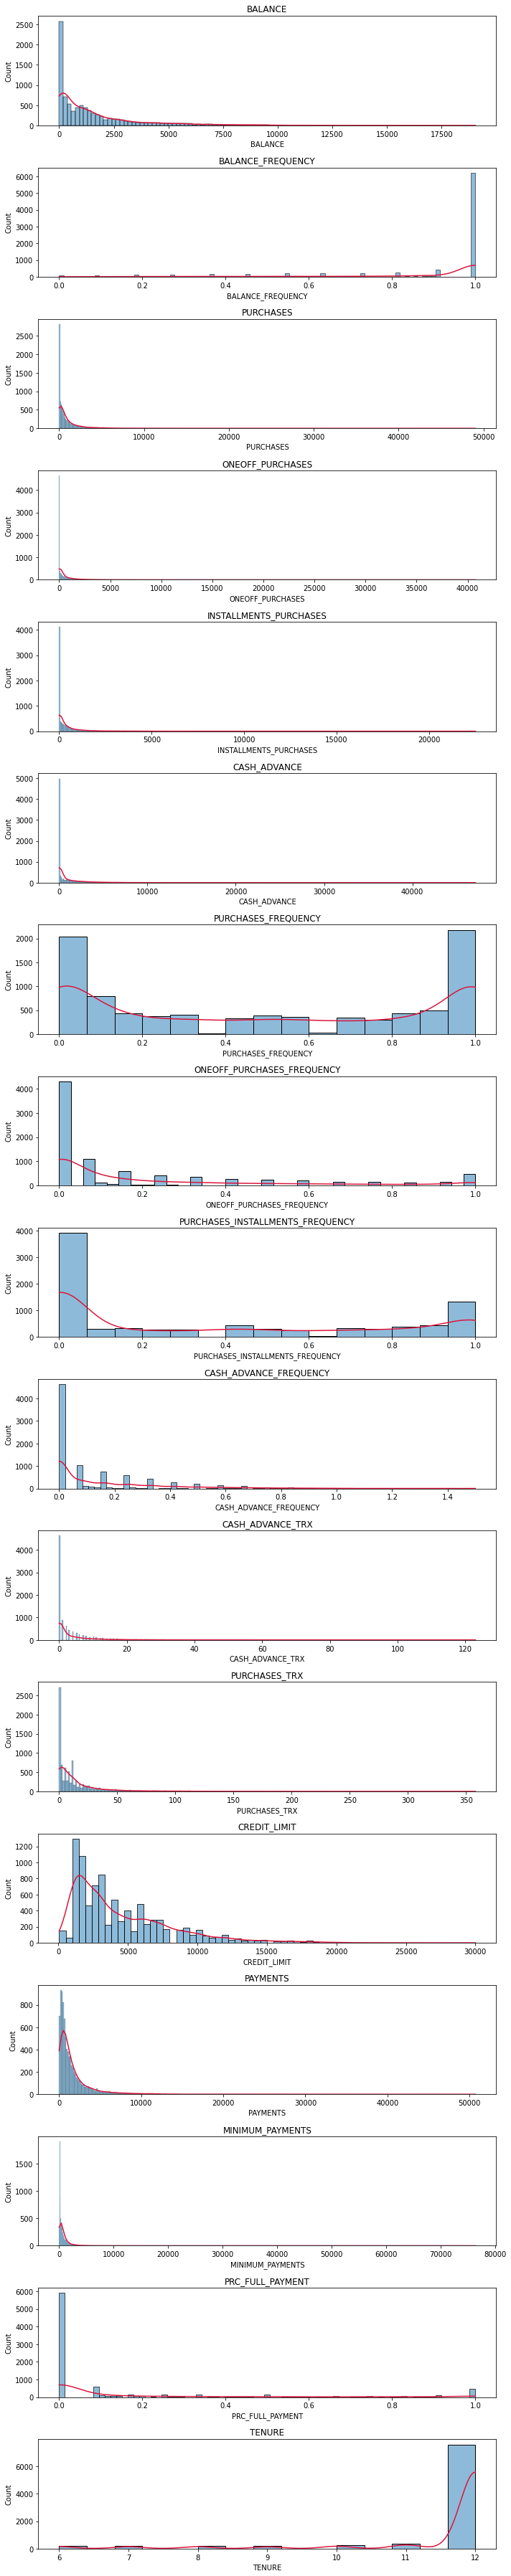

In [19]:
#kde_kws={'color':'b', 'lw':3, 'label':'KDE'}
plt.figure(figsize=(10, 50))
for i in range(17):
    plt.subplot(17, 1, i+1)
    ax = sns.histplot(cc_df[cc_df.columns[i]], kde=True)
    plt.title(cc_df.columns[i])
    ax.lines[0].set_color('crimson')

plt.tight_layout()

Comment on purchase-frequency

Comment on PRC_FULL_PAYMENT

**Correlation**

<AxesSubplot:>

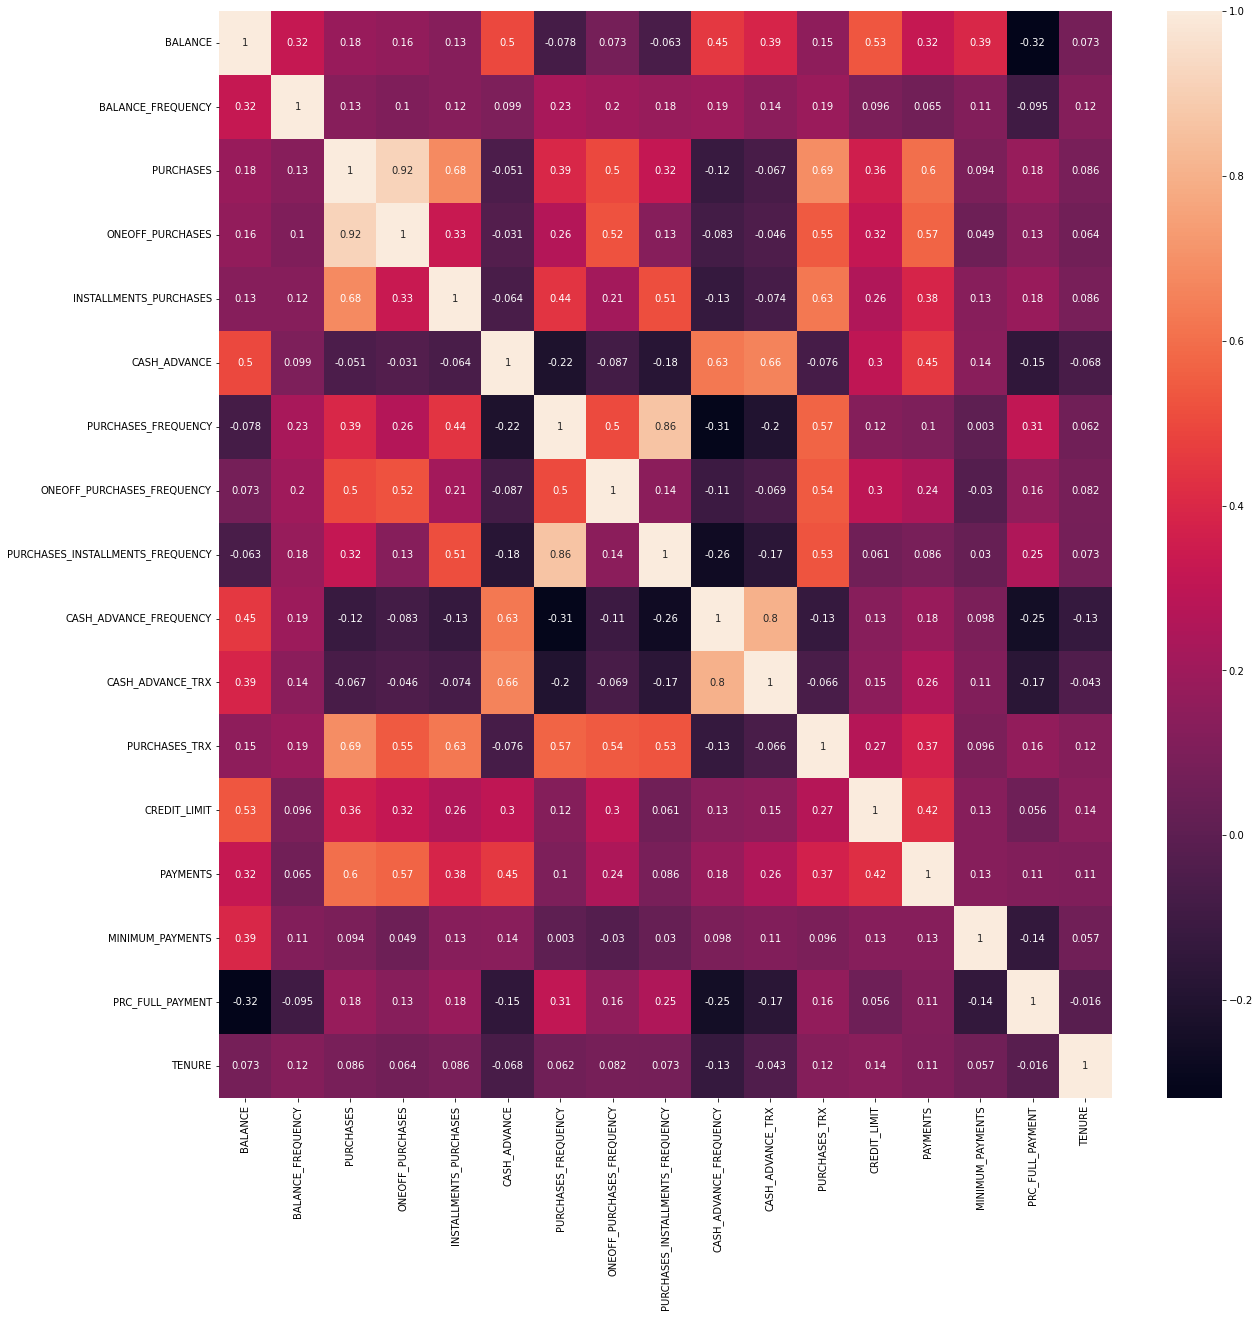

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(cc_df.corr(), annot=True)

## The Elbow Method

Determining the optiminal num of K clusters using the elbow method

**scale the data**

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cc_df)

In [22]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

**elbow method**

In [23]:
scores = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

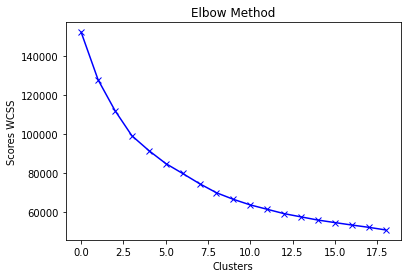

In [24]:
plt.plot(scores, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

we will use K = 8

## Apply KMeans Clustering

Unsupervised

In [25]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [26]:
labels

array([2, 3, 4, ..., 7, 7, 7], dtype=int32)

In [27]:
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361686,0.331481,-0.030326,-0.240393,0.369743,-0.361558,0.995615,-0.379984,1.206443,-0.471283,-0.359117,0.194052,-0.260447,-0.212928,-0.050942,0.315555,0.255413
1,-0.700759,-2.140309,-0.309715,-0.234214,-0.301910,-0.320376,-0.553668,-0.440610,-0.439313,-0.521412,-0.376356,-0.418458,-0.173339,-0.191541,-0.256694,0.286055,0.202767
2,0.007087,0.403693,-0.354318,-0.238770,-0.399006,-0.104671,-0.841383,-0.382931,-0.751474,0.086450,-0.040232,-0.477749,-0.307271,-0.253168,-0.008206,-0.455541,0.273501
3,1.657753,0.395982,-0.221867,-0.157242,-0.235787,1.985987,-0.483482,-0.210132,-0.424626,1.917213,1.912910,-0.270984,1.003957,0.789659,0.500582,-0.395747,0.074698
4,-0.119916,0.402597,0.580482,0.704295,0.078431,-0.332989,0.998230,1.914630,0.212651,-0.422462,-0.336574,0.665146,0.469246,0.173099,-0.156051,0.463739,0.274920
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,1.109462,0.475588,2.562527,1.824361,2.707493,-0.145878,1.170103,1.551578,1.293808,-0.271825,-0.132205,3.219813,1.324324,1.486158,0.811168,0.235531,0.335466
7,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669


In order to understand what these numbers mean, let's perform inverse transformation

In [29]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,811.656098,0.955796,938.413323,193.434747,745.421672,220.666395,0.889939,0.089101,0.843908,0.040836,0.798115,19.533234,3546.835418,1116.738167,745.489157,0.246009,11.859127
1,105.905016,0.370251,341.493787,203.690778,138.053897,307.026813,0.268137,0.071015,0.189843,0.030804,0.680473,4.308538,3863.769606,1178.650289,265.993165,0.237381,11.788673
2,1579.225963,0.972902,246.199565,196.127275,50.251594,759.370549,0.152663,0.088222,0.065782,0.152444,2.974275,2.834783,3376.473430,1000.246481,845.083567,0.020477,11.883333
3,5014.947599,0.971075,529.182929,331.448204,197.848833,5143.579580,0.296306,0.139771,0.195680,0.518798,16.303030,7.974186,8147.255382,4019.130346,2030.791904,0.037965,11.617284
4,1314.879752,0.972642,2243.414511,1761.422598,481.991913,280.576637,0.890989,0.773629,0.448950,0.050605,0.951957,31.242883,6201.759139,2234.247475,500.535333,0.289350,11.885231
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,3873.725850,0.989933,6478.082454,3620.502945,2859.420000,672.958339,0.959969,0.665323,0.878630,0.080749,2.346626,94.742331,9312.883436,6035.424224,2754.598237,0.222603,11.966258
7,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019


- First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104) and cash advance (303), Percentage of full payment = 23%
- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000) and cash advance (~5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- Third customer cluster (VIP/Prime): high credit limit 16K and highest percentage of full payment, target for increase credit limit and increase spending habits
- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [30]:
labels.shape

(8950,)

In [31]:
print('clusters range from ', labels.min(), 'to ', labels.max())

clusters range from  0 to  7


We will now add a column and assign the cluster associated with that individual.

We will concatinate our original df with the lables

In [32]:
#create a df that includes the clusters
clusters = pd.DataFrame({'clusters':labels})

#concat the new df with our original df
cluster_df = pd.concat([cc_df, clusters], axis = 1)

In [33]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


**Plot histogram of various clusters**

For every cluster, we have a historgram

In the below vizualization, let's look at a few clusters 2 and

**Cluster 3** <br>
The revolvers <br>
- High balance and high cash advance
- Balance frequency is almost all 1
- Frequencies are low, they don't make a lot of purchases
- A lot of cash advance frequency, use cash advance a lot
- A lot of cash advance trx, which is very lucrative

Distinct unique group of customers for the bank to target

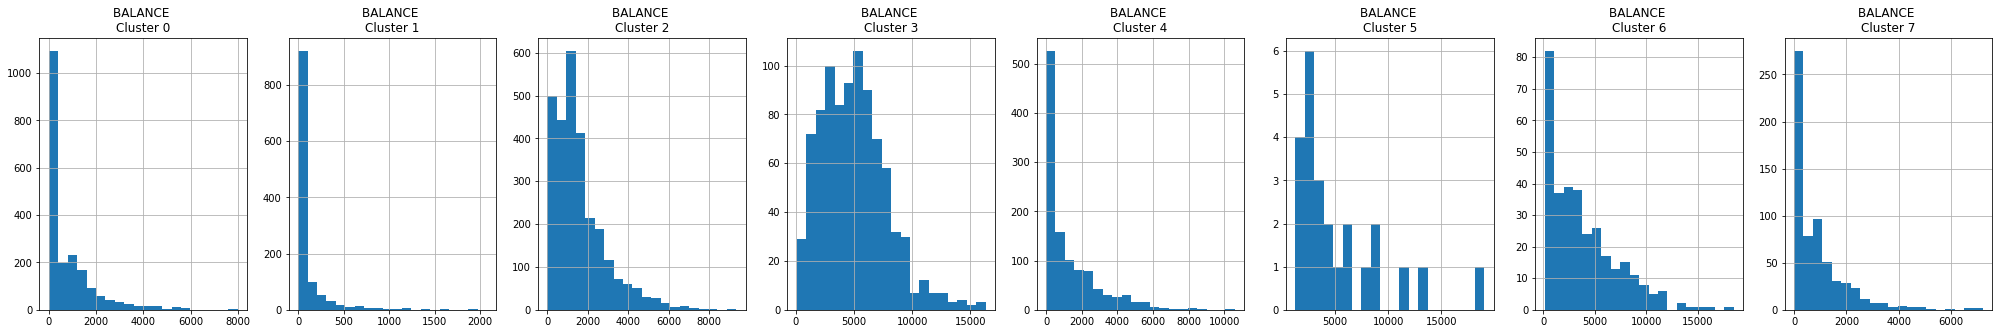

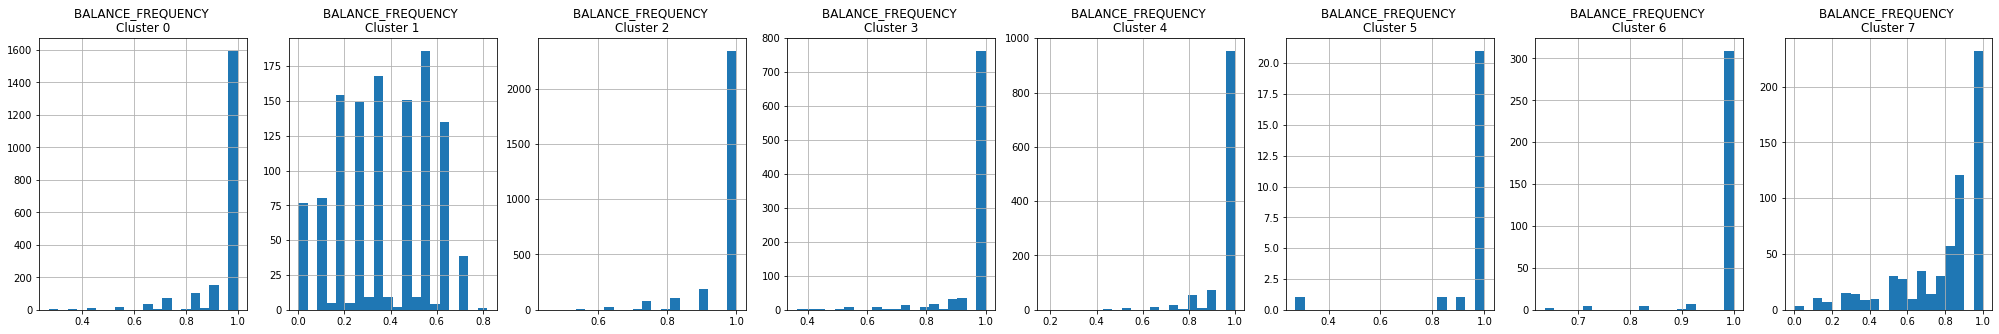

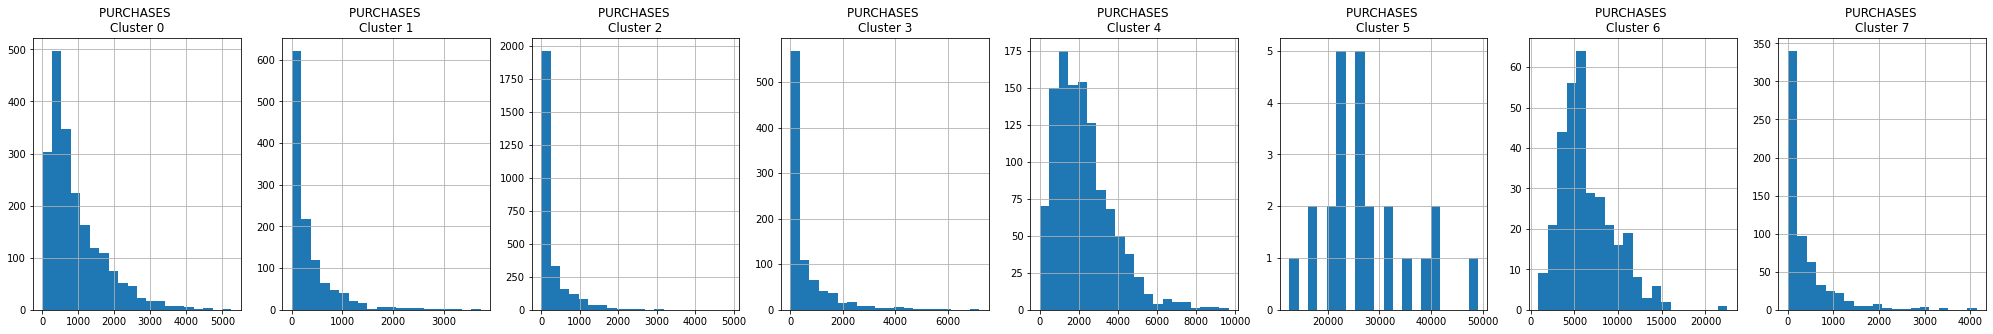

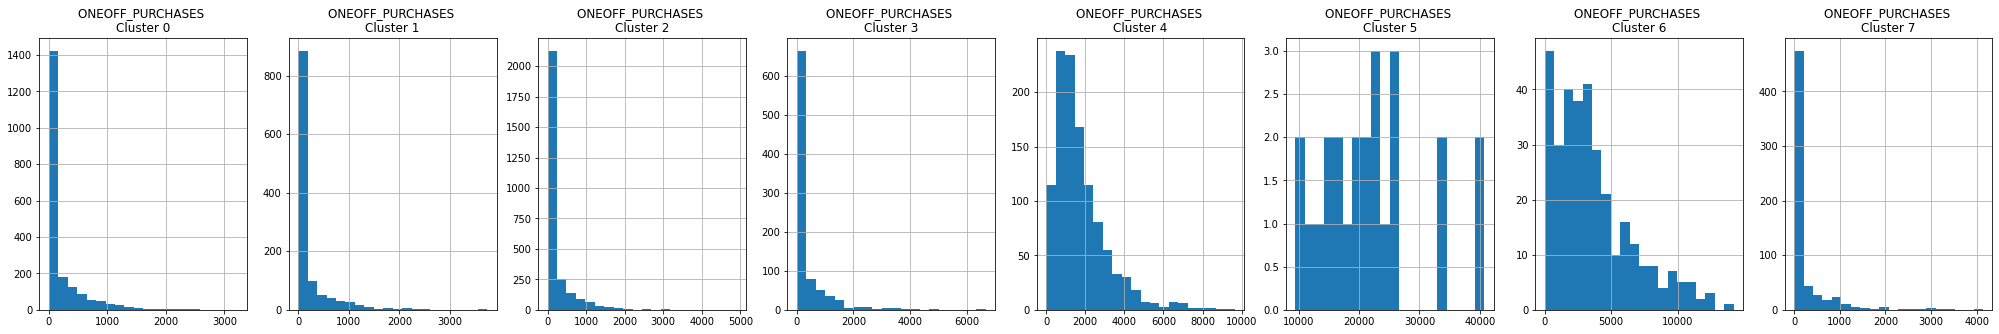

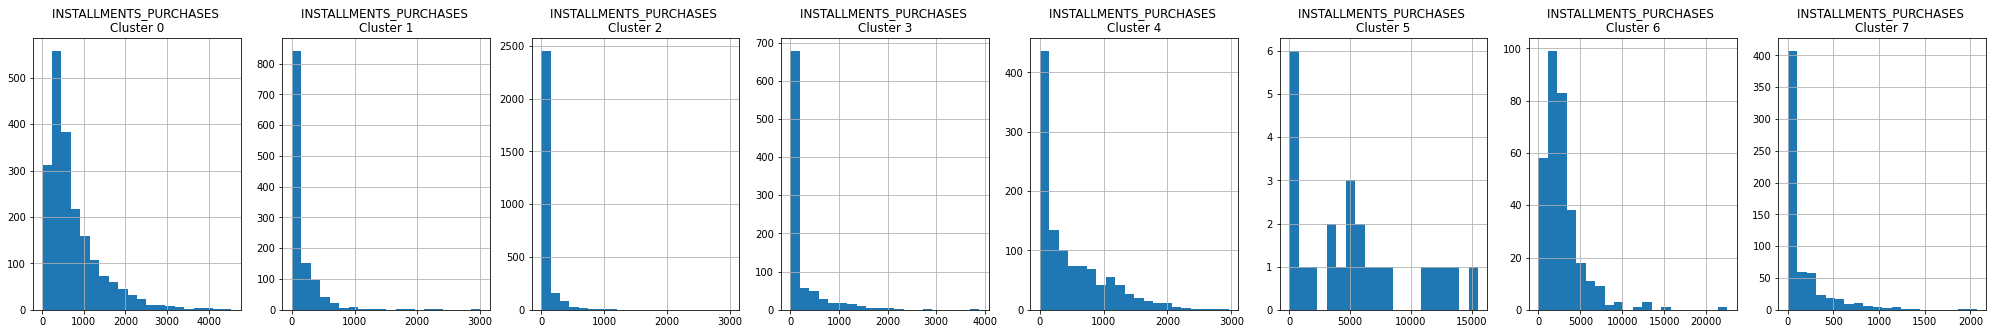

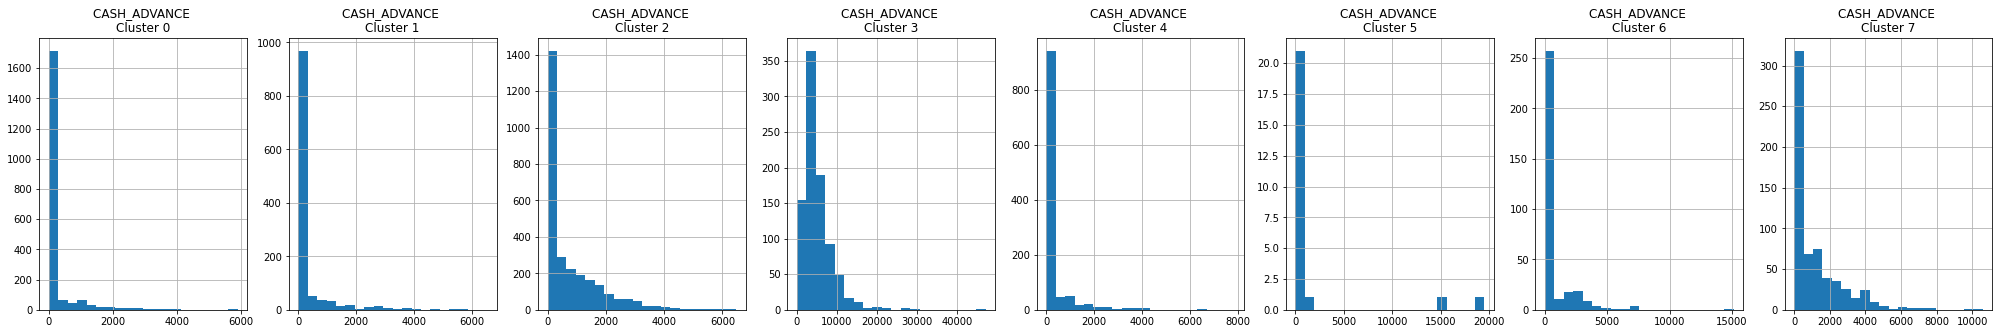

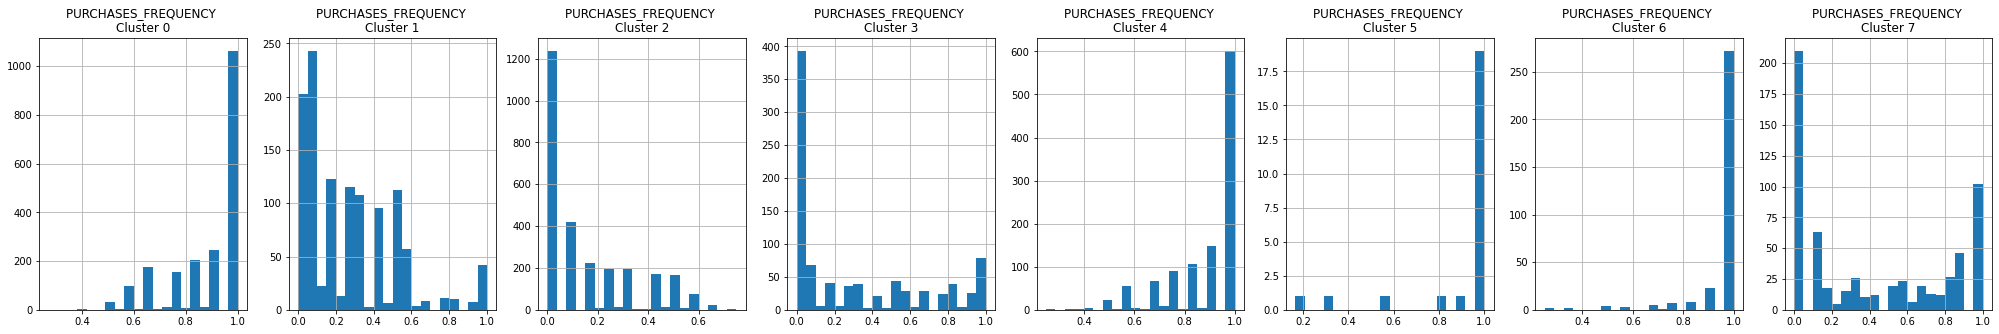

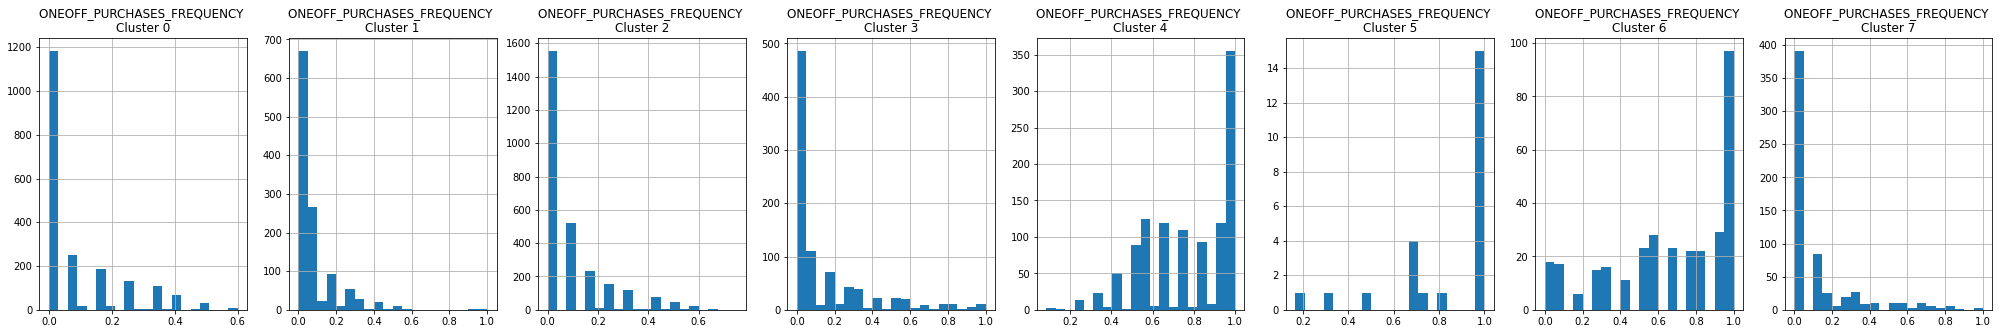

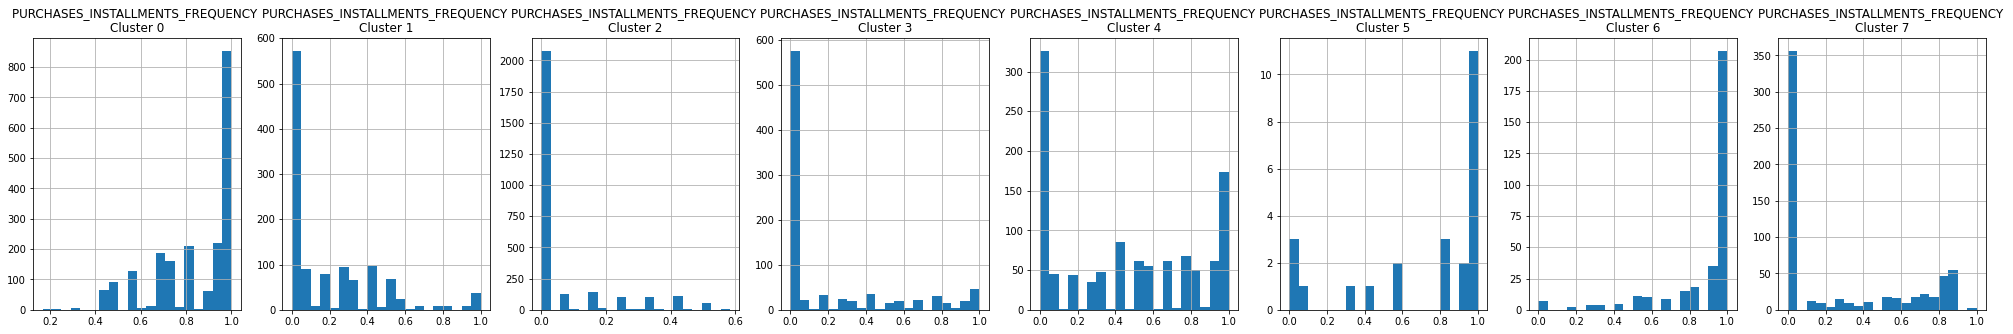

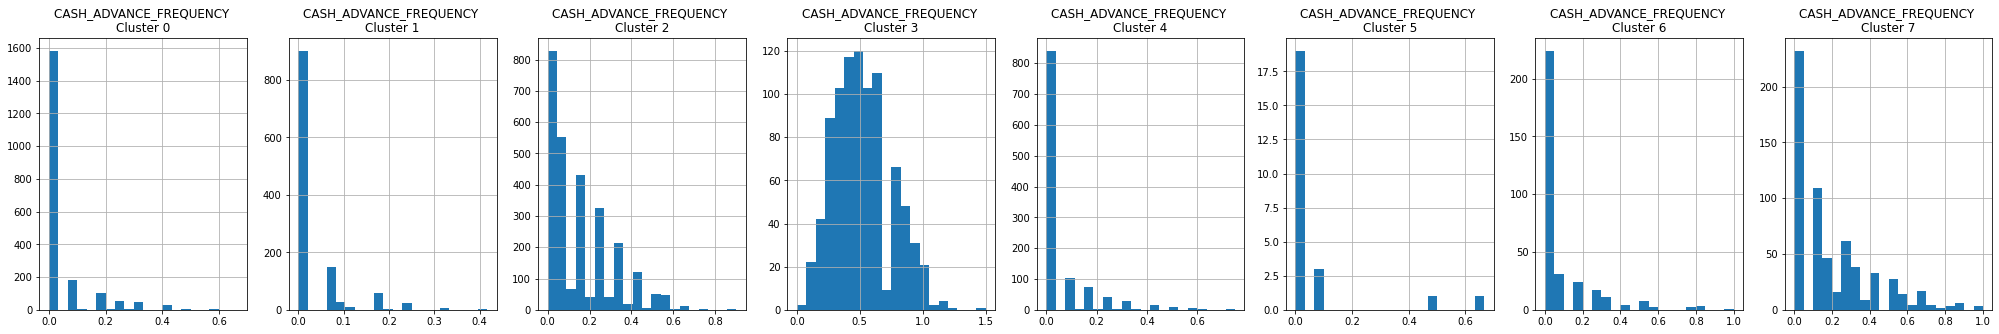

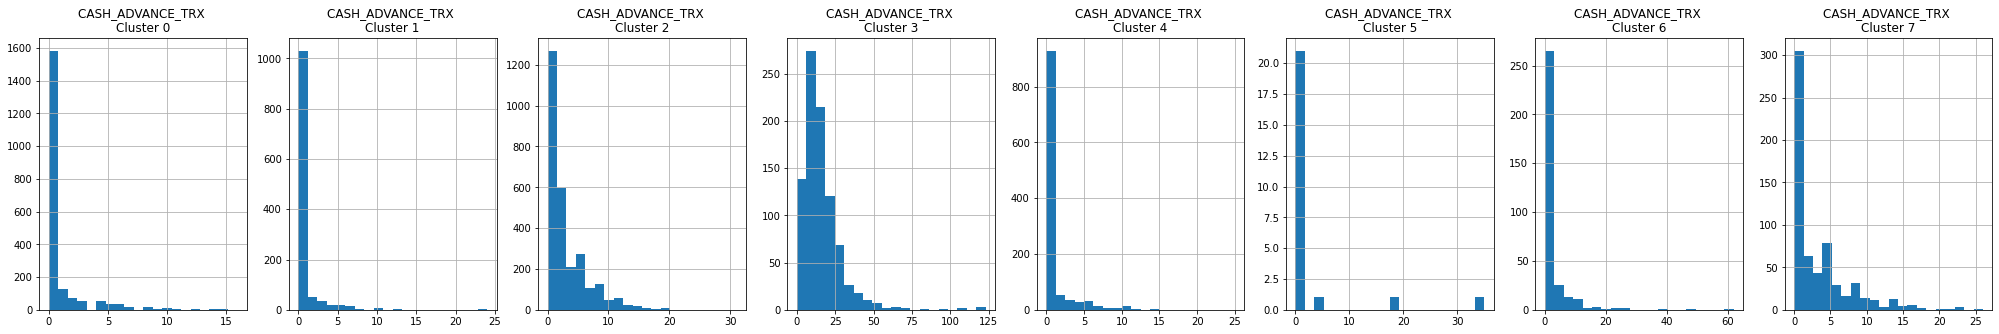

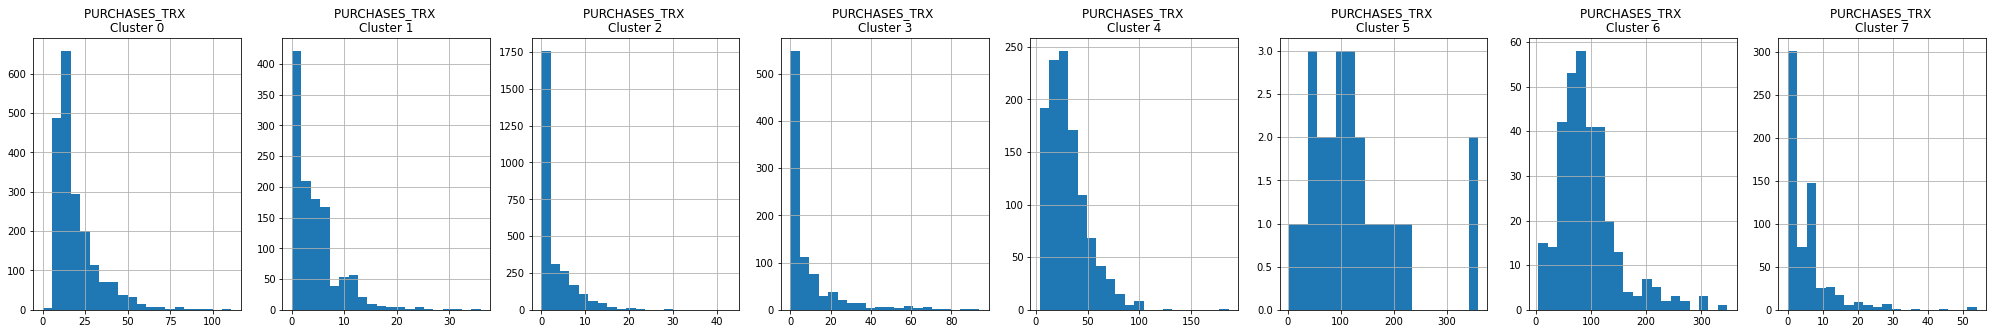

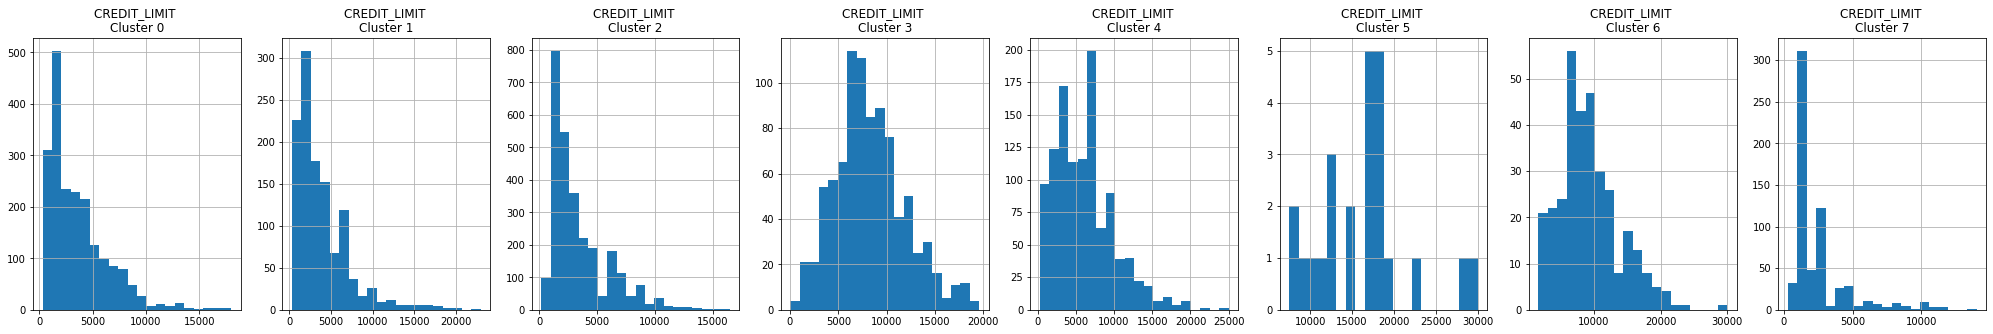

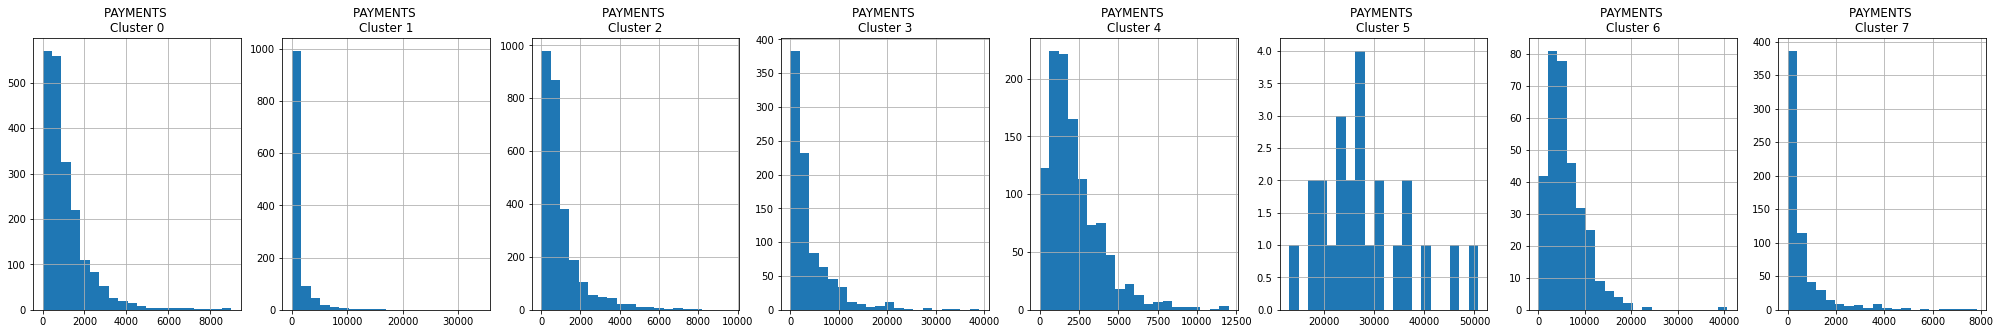

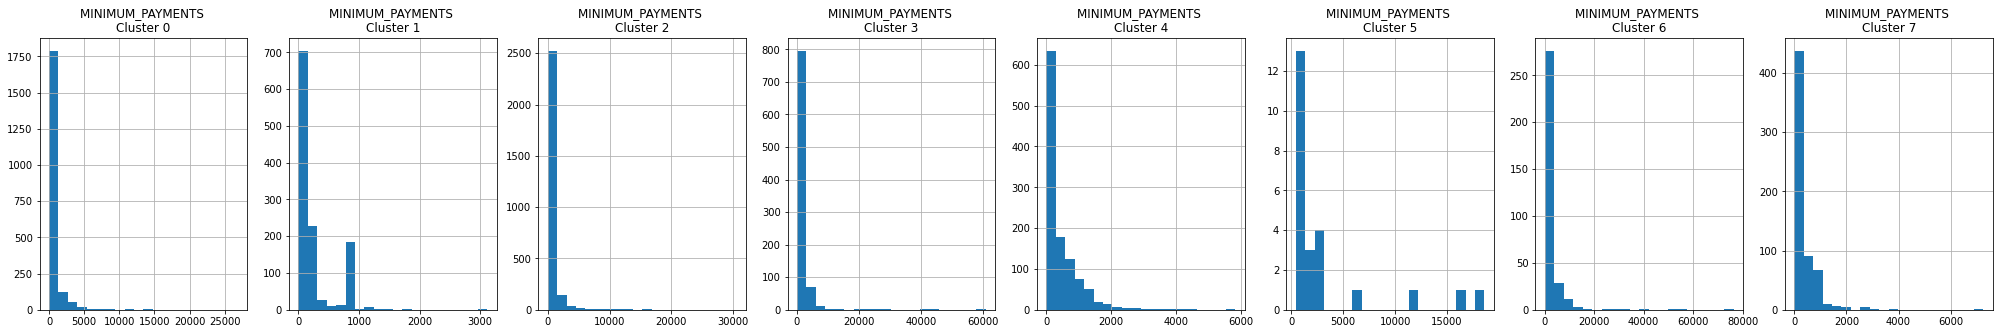

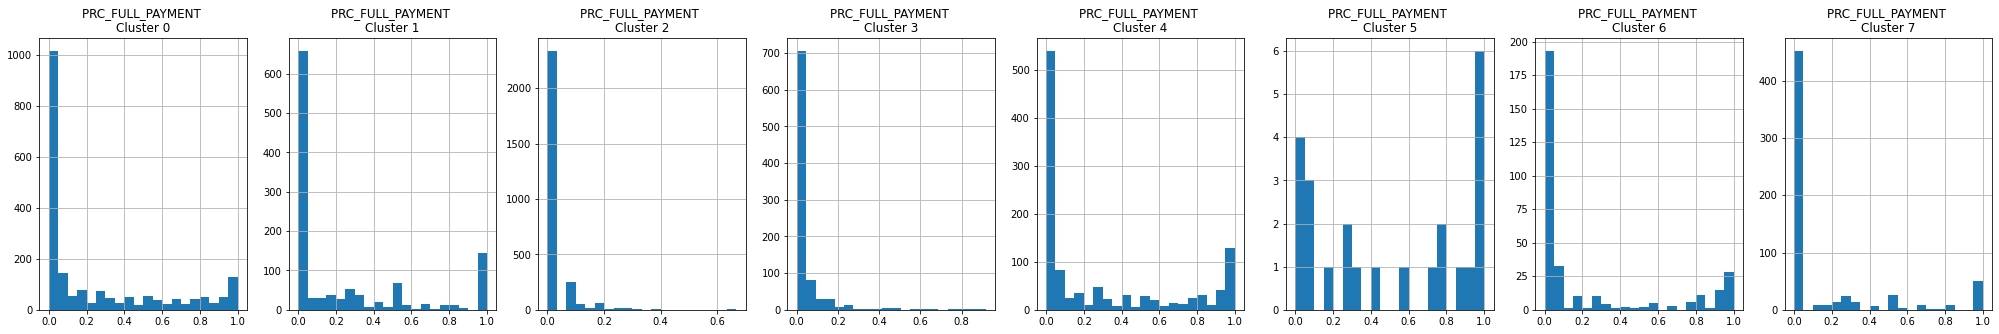

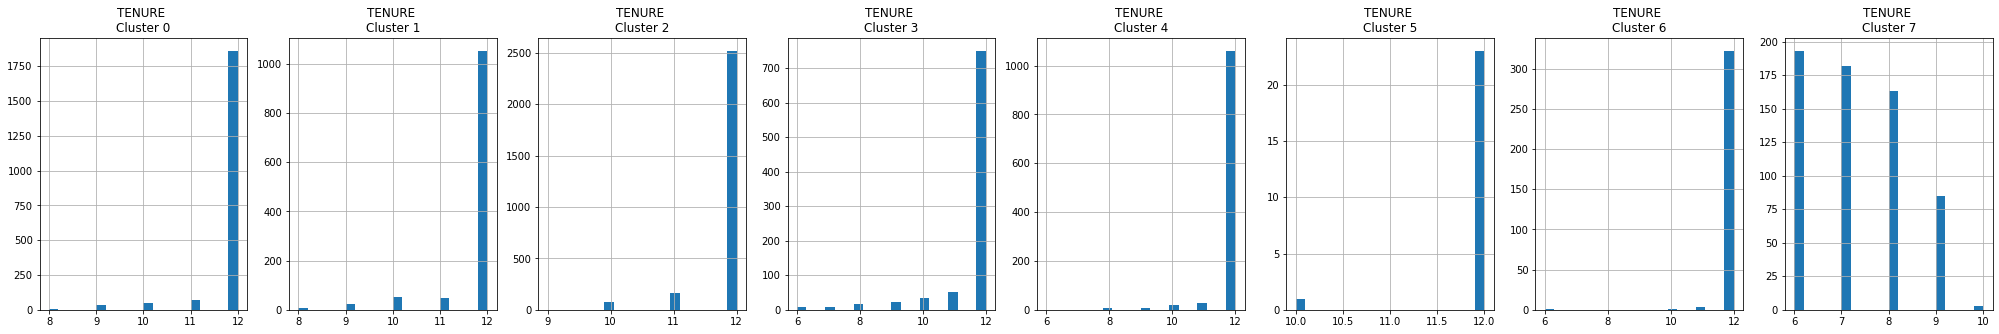

In [56]:
for i in cc_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = cluster_df[cluster_df['clusters'] == j]
        cluster[i].hist(bins = 20)
        plt.title(f'{i} \nCluster {j}')
plt.show()

**Observation**

## Principal Component Analysis (PCA)

**Obtaining the actual PCA**

In [34]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled) #fit the scaled df to the instanciated PCA

**Create a df to visualize**

We'll create a df with with the principal_comp so that we can concat to the original df and visualize

In [35]:
pca_df = pd.DataFrame(principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138294,2.506479
2,0.969674,-0.383542
3,-0.873630,0.043163
4,-1.599434,-0.688581


**Concat the pca df to the label cluster**

In [36]:
#Make a df from the lables
labels = pd.DataFrame({'cluster':labels})

#concat
pca_df = pd.concat([pca_df, labels], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,2
1,-1.138294,2.506479,3
2,0.969674,-0.383542,4
3,-0.873630,0.043163,2
4,-1.599434,-0.688581,2


**Visualization**

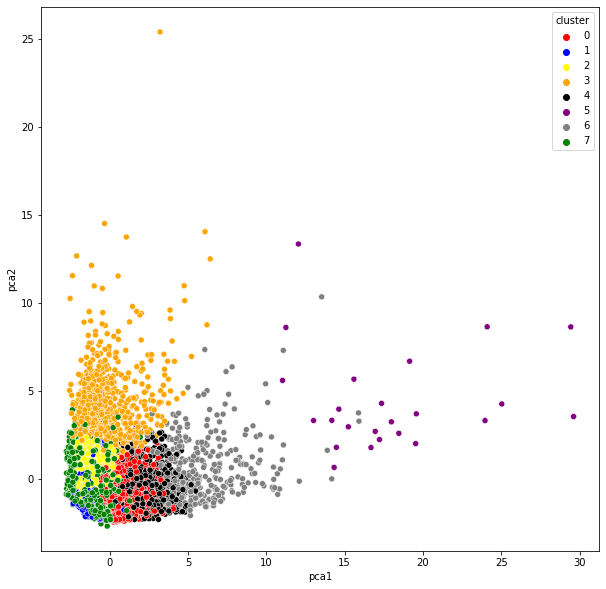

In [37]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = pca_df, x = 'pca1', y = 'pca2', hue = 'cluster', palette = ['red', 'blue', 'yellow', 'orange', 'black', 'purple', 'gray', 'green'])

## Deep Learning
### Applying Autoencoders to perform dimensionality reduction

There is some correlation in the data so autoencoders might be appropriate

**Import Libraries**

In [38]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [39]:
# since the df has 17 features
input_df = Input(shape = (17,))

#encoder
#fully connected artificial neural network
x = Dense(7, activation = 'relu')(input_df) #Layer 1
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

#encoded layer
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

#decorder network
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder
encoder = Model(input_df, encoded)

#complie
autoencoder.compile(optimizer='adam', loss = 'mean_squared_error')

2022-08-10 11:16:25.973023: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-10 11:16:25.974163: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [40]:
df_scaled.shape

(8950, 17)

**Train the model with the scaled data**

Here we train autoencoder to perform dimensionality reduction

In [41]:
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs=25, verbose=1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 4s 439us/sample - loss: 0.6028
Epoch 2/25
8950/8950 [==============================] - 3s 349us/sample - loss: 0.3449
Epoch 3/25
8950/8950 [==============================] - 3s 340us/sample - loss: 0.3034
Epoch 4/25
8950/8950 [==============================] - 3s 364us/sample - loss: 0.2711
Epoch 5/25
8950/8950 [==============================] - 3s 380us/sample - loss: 0.2459
Epoch 6/25
8950/8950 [==============================] - 3s 343us/sample - loss: 0.2216
Epoch 7/25
8950/8950 [==============================] - 3s 348us/sample - loss: 0.2185
Epoch 8/25
8950/8950 [==============================] - 3s 336us/sample - loss: 0.2059
Epoch 9/25
8950/8950 [==============================] - 3s 333us/sample - loss: 0.1947
Epoch 10/25
8950/8950 [==============================] - 3s 335us/sample - loss: 0.1862
Epoch 11/25
8950/8950 [==============================] - 3s 337us/sample - loss: 0.1731
Epoch 12/25
8950/89

We had 2.3 million parameters!

In [42]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 